# Sequential Gaussian simulation (conditional)


>**Note:** This notebook is inspired from the notebook [ex_geosclassic_2d.ipynb](https://github.com/randlab/geone/blob/master/examples/ex_geosclassic_2d.ipynb) by Julien Straubhaar.

We can use the same settings of the script `00_unconditional_SGS.ipynb` to perform some **conditional** simulations when some conditioning data are available.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import time

# import package 'geone'
import geone as gn

## Definition of a variogram model

The next step is to define a variogram (covariance) model. For the moment, we can start with a variogram with no anysotropy and no nugget effect.

Later on, we will try by changing the radius ('r') along different directions, that can be defined different from 0 using the argument `angle`. We will also try o add a value $>0$ for the weight `w` related to the nugget effect, and also other variogram models than the 'spherical' (try for example 'gaussian' or 'exponentian'). See the documentation related to `CovModel2D` for more information.

In [2]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('spherical', {'w':5., 'r':[150,150]}), # elementary contribution
    ('nugget', {'w':0.0})                    # elementary contribution
    ], name='model-2D')


## Grid definition

As for Kriging, we need to define the points where we want the values to be simulated (estimated) with SGS. In this case we need a 2D grid. For example, one can use

In [3]:
nx, ny = 220, 230  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = (nx, ny)
spacing = (dx, dy)
origin = (ox, oy)


## Conditioning data

The main difference from the notebook `00_uncoditional_SGS.npynb` is the following: some conditioning values of the variable $v$ are defined.

Note that in the past we often loaded these data (that were also used to compute an experimental variogram) from an extenal file.  
Here for simplicity we define them directly into the notebook. They are simply four points:

In [4]:
x = np.array([[ 10.,  20.], # 1st point
              [ 50.,  40.], # 2nd point
              [ 20., 150.], # 3rd point
              [200., 210.]]) # 4th point
v = [ -3.,  2.,   5.,  -1.] # values

## SGS simulation

We now enter into the "core" of our notebook, where the SGS will be performed.

For the moment, keep the number of realizations low (for example `nreal = 3`), to check if everithing works fine. Later on, we can set this value to a higher number, for example `100`.

In [5]:
nreal = 10
np.random.seed(321)
geosclassic_output = gn.geosclassicinterface.simulate2D(cov_model, dimension, spacing, origin, 
                                                        method='ordinary_kriging',
                                                        x=x, v=v, 
                                                        searchRadiusRelative=3.0, nneighborMax=12,
                                                        nreal=nreal)

Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20230914 / OpenMP 11 thread(s)]
Geos-Classic run complete


The syntax to retrieve the results of our simulation from the return value provided by `simulate2D` is the following

In [6]:
# Retrieve the realizations
simul = geosclassic_output['image']

You can explore the content of the output, which is a `Img object`, that is an image object (1D, 2D, 3D...) defined within the module `geone`.

On the output, you can compute some mean values, or a standard deviation, pixel wise.

In [7]:
# Compute mean and standard deviation (pixel-wise)
simul_mean = gn.img.imageContStat(simul, op='mean')
simul_std = gn.img.imageContStat(simul, op='std')

To plot one of of the realizations, you can use the following line (where `iv=2` means the 2nd realization)

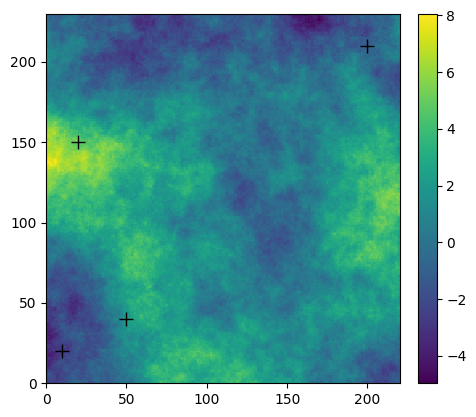

In [8]:
gn.imgplot.drawImage2D(simul, iv=2)
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations

You can also plot the mean value over many realizations... this will be more interesting when conditioning data are used and when many realizations are computed.

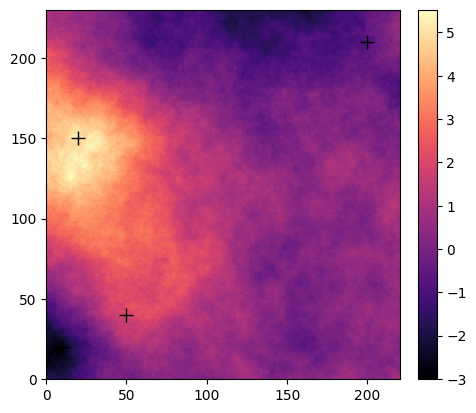

In [9]:
gn.imgplot.drawImage2D(simul_mean, cmap="magma")
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations

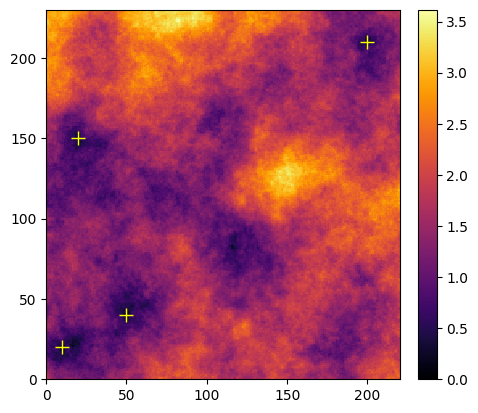

In [10]:
gn.imgplot.drawImage2D(simul_std, cmap="inferno")
pl.plot(x[:,0],x[:,1], '+', c='yellow', markersize=10) # add conditioning point locations

The effect of the conditioning points can be easily seen into the mean (and standard deviation maps).

## Ordinary Kriging

We can also check the results obtained with the same conditioning points and the same variogram by using for example ordinary Kriging

In [11]:
krige_out = gn.geosclassicinterface.estimate2D(cov_model, dimension, spacing, origin, 
                                                        x=x, v=v, method='ordinary_kriging',
                                                        searchRadiusRelative=2.0)

Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20230914 / OpenMP 11 thread(s)]
Geos-Classic run complete


Retrieve the output

In [12]:
krige = krige_out["image"]

Text(0.5, 1.0, 'Kriging standard deviation')

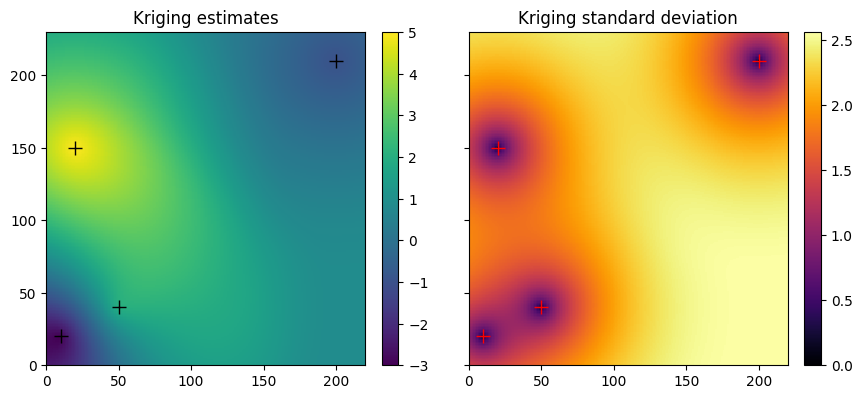

In [13]:
fig, ax = pl.subplots(1, 2, figsize=(10,5), sharey=True)

# kriging estimates
pl.subplot(1, 2, 1)
gn.imgplot.drawImage2D(krige, iv=0, cmap="viridis")
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations
pl.title('Kriging estimates')

# kriging standard deviation
pl.subplot(1, 2, 2)
gn.imgplot.drawImage2D(krige, iv=1, cmap='inferno')
pl.plot(x[:,0],x[:,1], '+', c='red', markersize=10) # add conditioning point locations
pl.title('Kriging standard deviation')